**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Osvaldo Trejo Noriega
*   MATRÍCULA: A01796850


---

1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [3]:
import pandas as pd


In [4]:
air_df = pd.read_csv('LaqnData.csv')
print(air_df.shape) # Muestra el numero de filas y columnas en una tupla
print(air_df.columns) # Muestra el nombre de las columnas del dataframe
print(air_df.head()) # Muestra los primeros 5 raws del dataframe
print(air_df.tail()) # Muestra los ultimos 5 raws del dataframe
print(air_df.dtypes) # Muestra el tipo de dato de cada columna

(43800, 6)
Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31/12/2017 22:00    5.0  ug m-3                       R
43799  CT3   PM2.5  31/12/2017 23:00    6.0  ug m-3      

In [5]:
air_df['ReadingDateTime'].nunique()

8760

In [6]:
# Valor faltante por columna
missing_percentage = air_df.isnull().mean() * 100
missing_percentage

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron? Se hicieron un total de 43800 mediciones

*   ¿Cuántos contaminantes del aire (`Species`) se analizaron? Los datos muestran que se hicieron en 5 especies

*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Las columnas de Site y Provisional or Ratified

*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [7]:
no_repited_values = air_df.nunique()
no_repited_values

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [8]:
air_df.nunique()
air_df['Units'].unique()
print(air_df['Units'].unique())
air_df_new = air_df.drop(columns=['Units', 'Provisional or Ratified', 'Site'])
print(air_df_new.shape)

['ug m-3' 'ug m-3 as NO2' 'ug/m3']
(43800, 3)


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [9]:
print(air_df_new['Species'].value_counts()) #Este codigo muestra el valor total por cada conteo de especie
print(air_df_new['Species'].value_counts().sum()) #Este codigo realiza la suma total de todas las especies y concide con el total de mediciones

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64
43800


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [10]:
air_df_new.groupby('Species')['Value'].mean()

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [11]:
pvt_df = air_df_new.pivot_table(index='ReadingDateTime', columns=['Species'])
pvt_df

Value                        
Species             NO   NO2   NOX  PM10 PM2.5
ReadingDateTime                               
01/01/2017 00:00   3.5  30.8  36.2  35.7   NaN
01/01/2017 01:00   3.6  31.5  37.0  28.5   NaN
01/01/2017 02:00   2.2  27.3  30.7  22.7   NaN
01/01/2017 03:00   2.1  23.5  26.8  20.5   NaN
01/01/2017 04:00   3.3  28.0  33.0  22.1   NaN
...                ...   ...   ...   ...   ...
31/12/2017 19:00   0.7  17.5  18.5  16.3  -2.0
31/12/2017 20:00   0.7  17.5  18.6  14.5   6.0
31/12/2017 21:00   0.7  14.1  15.1   8.6   5.0
31/12/2017 22:00   1.1  22.0  23.6  12.5   5.0
31/12/2017 23:00   0.9  19.4  20.7  10.4   6.0

[8737 rows x 5 columns]

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece? El mayor valor registrasdo es 120.2000 y fue el dia 24/01/2017 19:00

*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece? El menor valor de PM10 es -5.6 y el dia al que pretenece es 12/09/2017 23:00

*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta? La mediana del NO es 15.045 y es el punto intermediio entre los datos ordenados y no ordenas quiere decir que el 50 % de los datos esta por encima de 15.045 y el otro 50% esta por debajo de 15.045

*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa? El primer cuartil de 7.0 y se ignifica el valor por debajo del cual se encuentra el 25% de los datos.

In [12]:
pvt_df.describe()

Value                                                    
Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000

In [15]:
print(pvt_df.loc[pvt_df['Value']['NO2'] == pvt_df['Value']['NO2'].max()])
print(pvt_df.loc[pvt_df['Value']['PM10'] == pvt_df['Value']['PM10'].min()])


                      Value                              
Species                  NO    NO2        NOX  PM10 PM2.5
ReadingDateTime                                          
24/01/2017 19:00  148.60001  120.2  348.10001  44.4  42.0
                 Value                     
Species             NO  NO2  NOX PM10 PM2.5
ReadingDateTime                            
12/09/2017 23:00   0.1  7.0  7.1 -5.6   NaN


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad? El contaminante con mayor variabilidad es NO2 ya que tiene una distribucion mas grande en sus valores

array([[<Axes: title={'center': "('Value', 'NO')"}>,
        <Axes: title={'center': "('Value', 'NO2')"}>],
       [<Axes: title={'center': "('Value', 'NOX')"}>,
        <Axes: title={'center': "('Value', 'PM10')"}>],
       [<Axes: title={'center': "('Value', 'PM2.5')"}>, <Axes: >]],
      dtype=object)

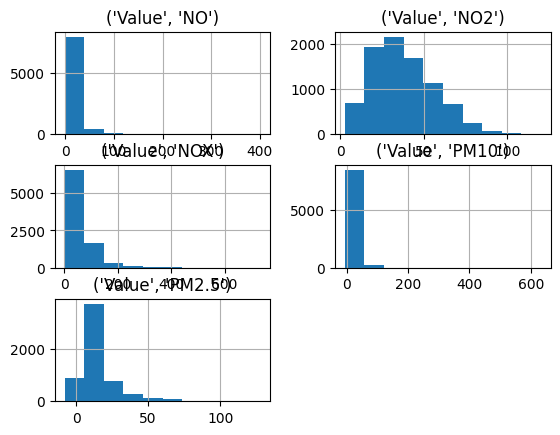

In [16]:
pvt_df.hist()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [17]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # Esta linea de comandos esta separando la fecha y como delimitador utiliza los espacios
datetime_df
datetime_df.columns = ['Date','Time'] # Esta renombrado las columnas por Date and Time
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True) #Separa el dia, mes y año con el delimitador /
date_df.columns = ['Day','Month','Year'] # Esta renombrando las columnas por Day, Month and Year
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year']) #Esta uniendo los dataframe con la columnas Day, Month and Year con el dataframe principal y esta removiendo las columnas ReadingDateTime y Year
air_df = air_df.set_index(['Month','Day','Time','Species']) # Este codigo esta setteando los indices con las columnas Month, Day, Time and Species
air_df

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

No son iguales ya que la función unstack reorganiza un indice en un dataframe,
transformando uno de los niveles del indice en columnas,
ademas de dar un mejor detalle de los datos y el codigo del ejercicio 8 trata de reoganizar y
procesar los datos ademas de dividir y agregar nuevas columnas
                  

In [18]:
air_df.unstack()


Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Los pares de funciones melt()/pivot() y stack()/unstack() en pandas tienen el propósito común de transformar la estructura de un DataFrame, pero se utilizan en contextos diferentes.

* Propósito:

    * melt()/pivot() convierten entre formatos ancho y largo. melt() transforma columnas en filas, mientras que pivot() realiza el proceso inverso.
    * stack()/unstack() reorganizan niveles entre índices y columnas en un DataFrame con índices jerárquicos.
* Requisitos:
    * melt() y pivot() funcionan con cualquier DataFrame, sin necesidad de índices jerárquicos.
    * stack() y unstack() requieren un MultiIndex para operar.

La función más similar a melt() es stack(), ya que ambas transforman datos de un formato más ancho a uno más largo. Sin embargo, melt() es más flexible porque no requiere un índice jerárquico.

En resumen, el uso de estos métodos depende de la estructura inicial del DataFrame y  si necesitas trabajar con índices jerárquicos (stack()/unstack()) o transformar formatos de datos sin índices jerárquicos (melt()/pivot()).

¿Cual eligiria?

Elegiría melt()/pivot() debido a su simplicidad y versatilidad en la manipulación de datos tabulares estándar. Sin embargo, si el proyecto implica índices jerárquicos y estructuras complejas, stack()/unstack() sería la mejor opción.